## Results of point pollution surface oil spill scenarios in the Strait of Juan de Fuca
Bulker Loss of Power as vessels leaves *Johnson Strait*, gets pushed on the shore before tug arrives on scene, spilling 1000 m<sup>-3</sup> of Bunker C. Scenario built on incident ROC report 323, 2020.
- *the description provided by the team stated this location, which we assumed should really say Jonhstone Strait, but the coordinates provided were in Juan de Fuca Strait, so Atlantis scenarios are based in Juan de Fuca*

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
affected_boxes = [1, 2]

### Define scenario and control files

In [3]:
hex_colour = '#A27170'
hatches = ['oo', '///', 'xx', '++']

In [4]:
# Oil injection file 
oil_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/contaminant-dispersal/results/ForcingFiles/')
oil_paths = sorted([p for p in oil_root.glob('SSAM_Scenario_7a*_10000_fromzarr.nc')])
oil_files = [xr.open_dataset(oil_scen,decode_cf=True) for oil_scen in oil_paths]

In [5]:
# Read in salish sea atlantis output files.
scenario_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/MPRI-1')

control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/v6719_50y_VBITBUCKET-ddmove0-2-ZGppreyWS-1-PL-fishing/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)
time = np.ma.filled(control.variables['t'])


In [6]:
scenario_paths = sorted([p for p in scenario_root.glob('Scenario_7a*/outputSalishSea.nc')])
for path in scenario_paths:
    print(path.parent.stem, groups.conditions[str(path.parent.stem).split(sep = '_')[3]])

Scenario_7a_1_2019-01-21 low Fraser flow spring tide winter
Scenario_7a_2_2019-01-26 low Fraser flow neap tide winter
Scenario_7a_3_2020-01-11 high Fraser flow spring tide winter
Scenario_7a_4_2020-01-03 high Fraser flow neap tide winter


In [7]:
scenario_datasets = [xr.open_dataset(scen,decode_cf=True) for scen in scenario_paths]

In [8]:
# start and end time of data display, after burn-in
start = 100
end = time.size-1

In [9]:
# Reading in Atlantis map
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df_original = gpd.read_file(shapefile_name)
data_df_original = data_df_original.sort_values(by=['BOX_ID'])
data_df = data_df_original.set_index('BOX_ID')
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]
land_df = data_df.loc[land_boxes]
jdf_df = data_df.loc[data_df.Region=='Juan de Fuca']
hs_df = data_df.loc[data_df.Region=='Howe Sound']
strait_df = data_df.loc[data_df.Region=='Strait of Georgia']
ps_df = data_df.loc[data_df.Region=='Puget Sound']

### Mapping spill extent

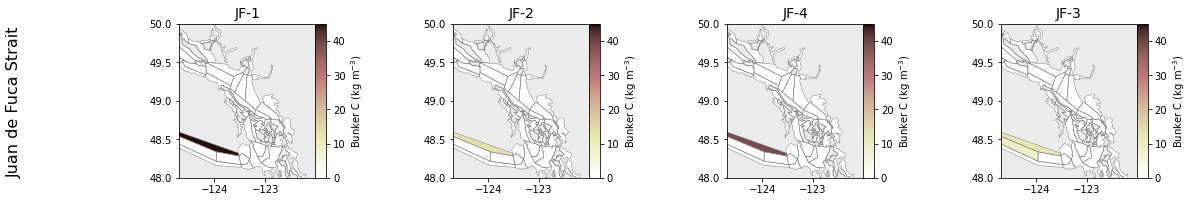

In [9]:
fig = plt.figure(figsize=(18, 6), facecolor='white') #figsize=(9, 12)
gs = plt.GridSpec(1, len(oil_files), wspace=0.5, hspace=0.2, height_ratios=[1],)

position = 0

for file, oil_path in zip(oil_files, oil_paths):
    date = str(oil_path).split(sep = '_')[3]
    label = 'JF-'+ str(groups.simulations[groups.conditions[date]])
    oil_tb = file.variables['oil']
    oil_b = oil_tb.mean(axis=0)

    # Add scenario data to Atlantis spatial data
    data_df['oil'] = oil_b
    data_df.loc[land_boxes, 'oil'] = 0
    #oil_df = data_df.loc[data_df['oil'] > 0]

    ax = fig.add_subplot(gs[0, position], facecolor = '#EBEBEB')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=-0.5)
    ax = data_df.plot(column = 'oil', ax=ax, cax=cax,cmap=cm.pink_r, legend_kwds={'label': 'Bunker C (kg m$^{-3}$)'}, vmax=45,
    #ax = data_df.plot(column = 'BOTZ', ax=ax, cax=cax,cmap=cm.Blues, legend_kwds={'label': 'depth (m)'},
    legend=True, 
    )
    ax.set_title(label, fontsize = 14) #loc='left'
    ax.set_xlim(-124.7)
    ax.set_ylim(48, 50)
    data_df.boundary.plot(ax=ax, color='grey', linewidths=0.5)
    land_df.plot(ax=ax, color='#EBEBEB')
    #oil_df.plot(ax=ax, color='red',linewidths=0.5)
    position = position+1
fig.supylabel('Juan de Fuca Strait', fontsize = 16); #color=hex_colour

### Oil injection

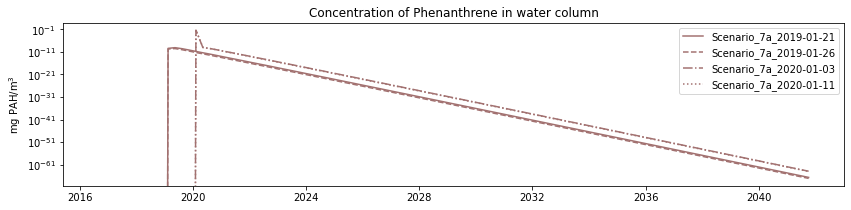

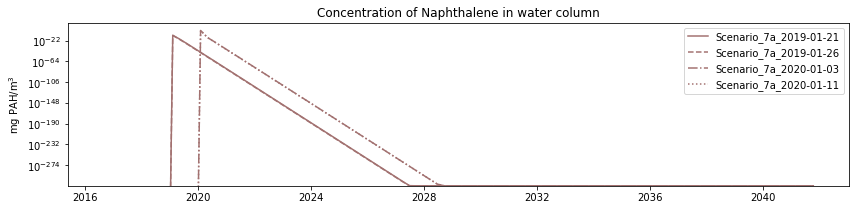

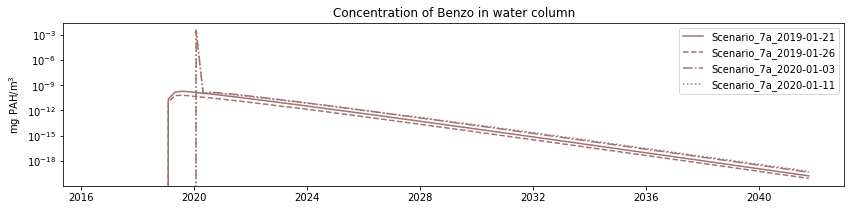

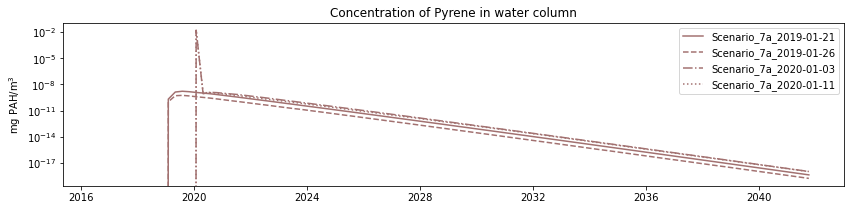

In [60]:
for pah in groups.pahs:
  splot.plot_pah(pah, scenario_datasets,scenario_paths, start, end, color=hex_colour)

## Results
### Time-separated box plot

In [10]:
print('closest time points to 2019 spill: ' + str(time[110]))
print('5 years post spill: ' + str((time[130])))
print('10 years post spill: ' + str(time[151]))
print('20 years post spill: ' + str(time[191]))

closest time points to 2019 spill: 2019-02-07T14:00:00.000000000
5 years post spill: 2024-01-12T14:00:00.000000000
10 years post spill: 2029-03-16T14:00:00.000000000
20 years post spill: 2039-01-23T14:00:00.000000000


In [11]:
print('closest time points to 2020 spill: ' + str(time[118]))
print('5 years post spill: ' + str((time[134])))
print('10 years post spill: ' + str(time[154]))
print('20 years post spill: ' + str(time[195]))

closest time points to 2020 spill: 2021-01-27T14:00:00.000000000
5 years post spill: 2025-01-06T14:00:00.000000000
10 years post spill: 2029-12-11T14:00:00.000000000
20 years post spill: 2040-01-18T14:00:00.000000000


In [12]:
days2019winter = [110, 130, 151, 191]
days2020winter = [118, 134, 154, 195]

In [13]:
def progressive_boxplot_pelagic(bio_group, location=groups.salish_sea, x_lim=None):
    all_results = []
    data_labels = ['spill year', '5 years later', '10 years later', '20 years later']

    for scenario, path in zip(scenario_datasets, scenario_paths):
        nm = str(path.parent.stem).split(sep='_')
        year = str(nm[3]).split(sep='-')[0]
        scenario_name = 'JF-'+nm[2] 

        if year == '2019':
            end_days = days2019winter
        elif year == '2020':
            end_days = days2020winter

        for species in bio_group:
            results = []
            for day in end_days:
                p_oiled = np.ma.filled(scenario.variables[bio_group[species] + '_N'][start:day, location, 0:6], np.nan)
                p_control = np.ma.filled(control.variables[bio_group[species] + '_N'][start:day, location, 0:6], np.nan)
                
                p_oiled = p_oiled.sum(axis=(1, 2)).mean()
                p_control = p_control.sum(axis=(1, 2)).mean()
                
                ratio = (p_oiled / p_control - 1) * 100
                results.append(ratio)

            for label, value in zip(data_labels, results):
                all_results.append({
                    'bio_group': bio_group[species],
                    'sensitivity': groups.sensitivity[species],
                    'sensitivity_negative': -groups.sensitivity[species],
                    'time_label': label,
                    'scenario': scenario_name,
                    'percent_change': value
                })

    df = pd.DataFrame(all_results)
    df.to_csv("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/MPRI-1/7a-jstrait-"+str(bio_group[species])+".csv")
    #print(df)
    
    time_labels = df['time_label'].unique()
    bio_groups = df['bio_group'].unique()
    scenarios = df['scenario'].unique()
    colors = plt.cm.tab10.colors

    n_rows = len(bio_groups)
    n_cols = len(time_labels)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, n_rows+1), sharey=True)

    if n_cols == 1:
        axes = [axes]  

    bar_width = 0.8 / len(scenarios)  
    y_pos = np.arange(len(bio_groups))

    for i, time in enumerate(time_labels):
        ax = axes[i]
        for j, scenario in enumerate(scenarios):
            df_plot = df[(df['time_label'] == time) & (df['scenario'] == scenario)]
            df_plot = df_plot.set_index('bio_group').reindex(bio_groups)
            offset = (j - len(scenarios)/2) * bar_width + bar_width/2

            ax.barh(y_pos + offset, df_plot['percent_change'], height=bar_width, label=scenario, facecolor=hex_colour, alpha=0.8, edgecolor='black', hatch=hatches[j])
        ax.barh(bio_groups, df_plot['sensitivity'], label=scenario, color='grey', alpha=0.3)
        ax.barh(bio_groups, df_plot['sensitivity_negative'], label=scenario, color='grey', alpha=0.3)
        ax.xaxis.grid(True)
          
        ax.set_title(time, fontsize=15)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(bio_groups, fontsize=15) 
        ax.set_xlim(x_lim)
        ax.set_xlabel("Percent Change", fontsize=13)

    fig.legend(np.append(scenarios,'model threshold'), loc='upper center', ncol=len(scenarios)+1, fontsize=15) 
    #plt.tight_layout(rect=[0, 0, 1, 0.95])
    #axes[0].set_ylabel(bio_groups)
    plt.show()

In [14]:
def progressive_boxplot_benthic(bio_group, location=groups.salish_sea, x_lim=None):
    all_results = []
    data_labels = ['spill year', '5 years later', '10 years later', '20 years later']

    for scenario, path in zip(scenario_datasets, scenario_paths):
        nm = str(path.parent.stem).split(sep='_')
        year = str(nm[3]).split(sep='-')[0]
        scenario_name = 'JF-'+nm[2]  

        if year == '2019':
            end_days = days2019winter
        elif year == '2020':
            end_days = days2020winter

        for species in bio_group:
            results = []
            for day in end_days:
                p_oiled = np.ma.filled(scenario.variables[bio_group[species] + '_N'][start:day, location], np.nan)
                p_control = np.ma.filled(control.variables[bio_group[species] + '_N'][start:day, location], np.nan)
                
                p_oiled = p_oiled.sum(axis=(1)).mean()
                p_control = p_control.sum(axis=(1)).mean()
                
                ratio = (p_oiled / p_control - 1) * 100
                results.append(ratio)

            for label, value in zip(data_labels, results):
                all_results.append({
                    'bio_group': bio_group[species],
                    'sensitivity': groups.sensitivity[species],
                    'sensitivity_negative': -groups.sensitivity[species],
                    'time_label': label,
                    'scenario': scenario_name,
                    'percent_change': value
                })

    df = pd.DataFrame(all_results)
    #df.to_csv("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/MPRI-1/affected-boxes-7a-jstrait-benthos.csv")
    #print(df)
    
    time_labels = df['time_label'].unique()
    bio_groups = df['bio_group'].unique()
    scenarios = df['scenario'].unique()
    colors = plt.cm.tab10.colors

    n_rows = len(bio_groups)
    n_cols = len(time_labels)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, n_rows+1), sharey=True)

    if n_cols == 1:
        axes = [axes]  

    bar_width = 0.8 / len(scenarios)  
    y_pos = np.arange(len(bio_groups))

    for i, time in enumerate(time_labels):
        ax = axes[i]
        for j, scenario in enumerate(scenarios):
            df_plot = df[(df['time_label'] == time) & (df['scenario'] == scenario)]
            df_plot = df_plot.set_index('bio_group').reindex(bio_groups)  # Ensure consistent order
            offset = (j - len(scenarios)/2) * bar_width + bar_width/2

            ax.barh(y_pos + offset, df_plot['percent_change'], height=bar_width, label=scenario, facecolor=hex_colour, edgecolor='black', alpha=0.8, hatch=hatches[j])
        ax.barh(bio_groups, df_plot['sensitivity'], label=scenario, color='grey', alpha=0.3)
        ax.barh(bio_groups, df_plot['sensitivity_negative'], label=scenario, color='grey', alpha=0.3)
        ax.xaxis.grid(True)
       
        ax.set_title(time, fontsize=15)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(bio_groups, fontsize=15) 
        ax.set_xlim(x_lim)
        ax.set_xlabel("Percent Change", fontsize=13)

    fig.legend(np.append(scenarios,'model threshold'), loc='upper center', ncol=len(scenarios)+1, fontsize=15) 
    #plt.tight_layout(rect=[0, 0, 1, 0.95])
    #axes[0].set_ylabel(bio_groups)
    plt.show()

In [15]:
def progressive_boxplot_vertebrates(bio_group, location=groups.salish_sea, x_lim=None):
    all_results = []
    data_labels = ['spill year', '5 years later', '10 years later', '20 years later']

    for scenario, path in zip(scenario_datasets, scenario_paths):
        nm = str(path.parent.stem).split(sep='_')
        year = str(nm[3]).split(sep='-')[0]
        scenario_name = 'JF-'+nm[2]  # Readable scenario name

        if year == '2019':
            end_days = days2019winter
        elif year == '2020':
            end_days = days2020winter

        for species in bio_group:
            results = []
            numCohorts = groups.cohorts[bio_group[species]]
            for day in end_days:

                sum_ratio = 0

                for cohort in range (1, numCohorts+1):

                    new_species = bio_group[species] + str(cohort)
                
                    o_numbers_tbl = np.ma.filled(scenario.variables[new_species + '_Nums'][start:day, location, 0:6], np.nan)
                    o_structuralN_tbl = np.ma.filled(scenario.variables[new_species +'_StructN'][start:day, location, 0:6], np.nan)
                    o_reservedN_tbl = np.ma.filled(scenario.variables[new_species +'_ResN'][start:day, location, 0:6], np.nan)

                    c_numbers_tbl = np.ma.filled(control.variables[new_species + '_Nums'][start:day, location, 0:6], np.nan)
                    c_structuralN_tbl = np.ma.filled(control.variables[new_species +'_StructN'][start:day, location, 0:6], np.nan)
                    c_reservedN_tbl = np.ma.filled(control.variables[new_species +'_ResN'][start:day, location, 0:6], np.nan)

                    o_weightatage_tbl = (o_structuralN_tbl + o_reservedN_tbl) * o_numbers_tbl 
                    o_weightatage = o_weightatage_tbl.sum(axis=(1,2)).mean()

                    c_weightatage_tbl = (c_structuralN_tbl + c_reservedN_tbl) * c_numbers_tbl 
                    c_weightatage = c_weightatage_tbl.sum(axis=(1,2)).mean()

                    #difference = o_weightatage_tb.sum(axis=1) - c_weightatage_tb.sum(axis=1) 
                    ratio = (o_weightatage / c_weightatage - 1) * 100
                    #print(ratio)
                    sum_ratio = sum_ratio + ratio

                results.append(sum_ratio/numCohorts)

            for label, value in zip(data_labels, results):
                all_results.append({
                    'bio_group': bio_group[species],
                    'sensitivity': groups.sensitivity[species],
                    'sensitivity_negative': -groups.sensitivity[species],
                    'time_label': label,
                    'scenario': scenario_name,
                    'percent_change': value
                })

    df = pd.DataFrame(all_results)
    #df.to_csv("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/MPRI-1/6a-english-bay-"+str(bio_group[species])+".csv")
    #print(df)
    
    time_labels = df['time_label'].unique()
    bio_groups = df['bio_group'].unique()
    scenarios = df['scenario'].unique()
    colors = plt.cm.tab10.colors

    n_rows = len(bio_groups)
    n_cols = len(time_labels)
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, n_rows+1), sharey=True)

    if n_cols == 1:
        axes = [axes]  # Make iterable if only 1 subplot

    bar_width = 0.8 / len(scenarios)  # space per group divided by number of scenarios
    y_pos = np.arange(len(bio_groups))

    for i, time in enumerate(time_labels):
        ax = axes[i]
        for j, scenario in enumerate(scenarios):
            df_plot = df[(df['time_label'] == time) & (df['scenario'] == scenario)]
            df_plot = df_plot.set_index('bio_group').reindex(bio_groups)  # Ensure consistent order
            offset = (j - len(scenarios)/2) * bar_width + bar_width/2

            ax.barh(y_pos + offset, df_plot['percent_change'], height=bar_width, label=scenario, facecolor=hex_colour, alpha=0.6, edgecolor='black', hatch=hatches[j])
        ax.barh(bio_groups, df_plot['sensitivity'], label=scenario, color='grey', alpha=0.3)
        ax.barh(bio_groups, df_plot['sensitivity_negative'], label=scenario, color='grey', alpha=0.3)
        ax.xaxis.grid(True)
       
        ax.set_title(time, fontsize=15)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(bio_groups, fontsize=15) 
        ax.set_xlim(x_lim)
        ax.set_xlabel("Percent Change", fontsize=13)

    fig.legend(np.append(scenarios,'model threshold'), loc='upper center', ncol=len(scenarios)+1, fontsize=15) 
    #plt.tight_layout(rect=[0, 0, 1, 0.95])
    #axes[0].set_ylabel(bio_groups)
    plt.show()

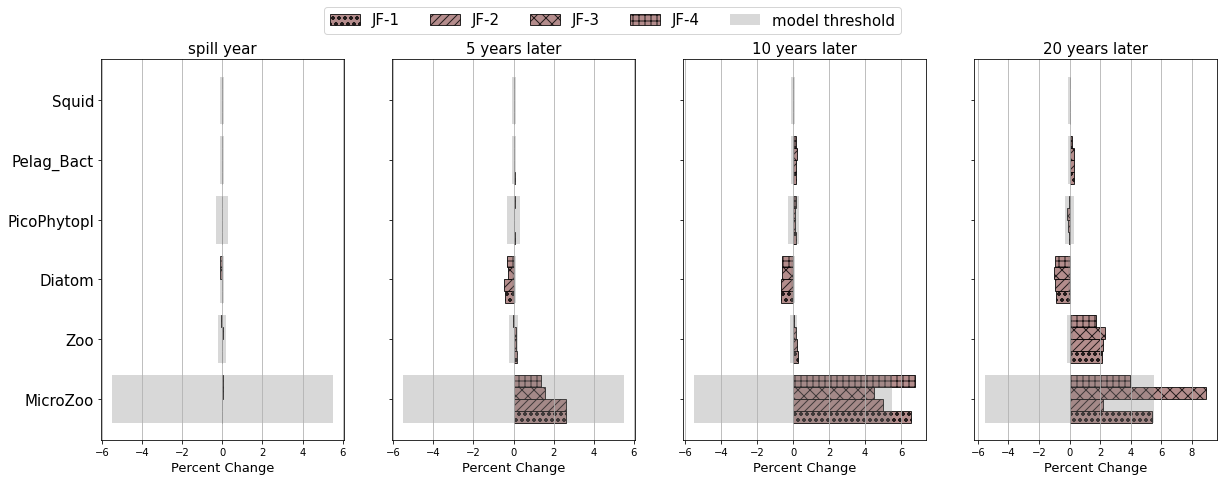

In [16]:
progressive_boxplot_pelagic(groups.planktonic)

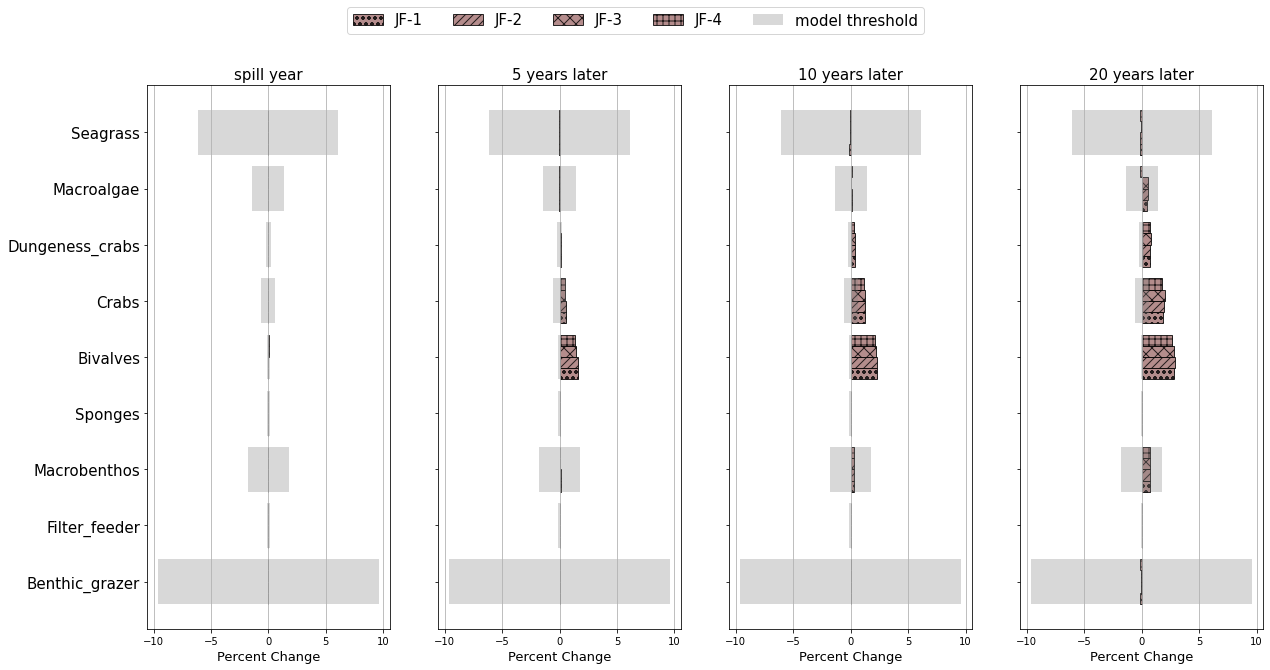

In [17]:
progressive_boxplot_benthic(groups.benthos)

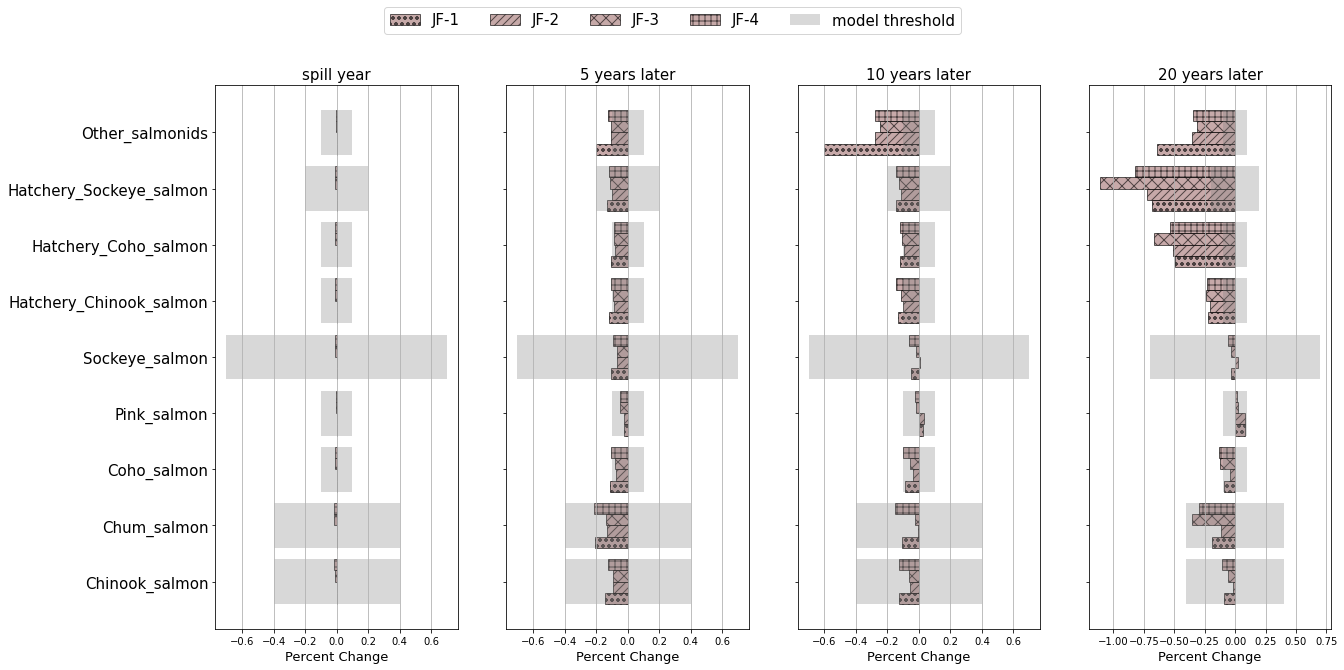

In [18]:
progressive_boxplot_vertebrates(groups.salmon)

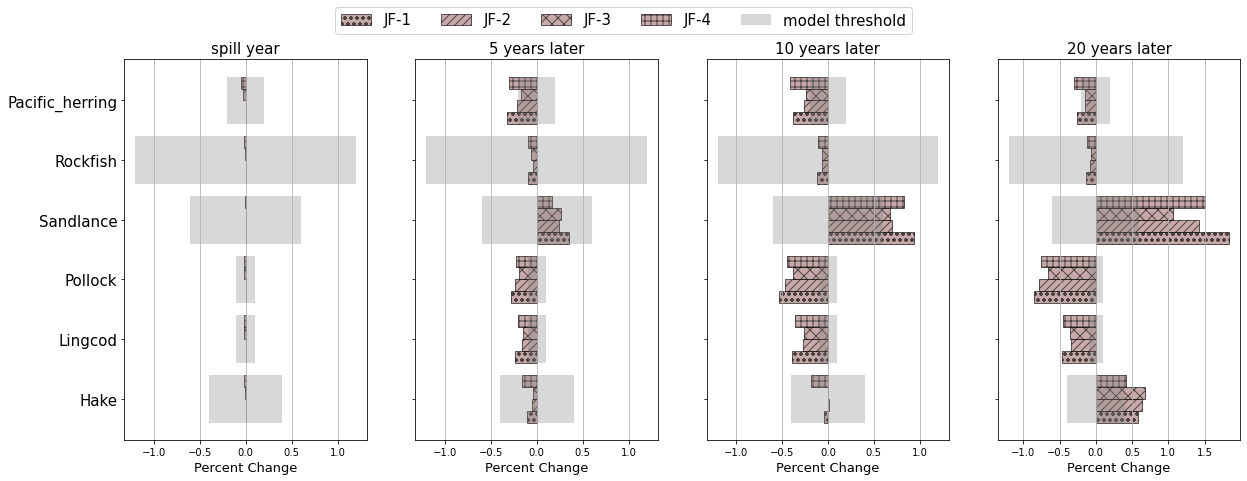

In [19]:
progressive_boxplot_vertebrates(groups.named_fish)

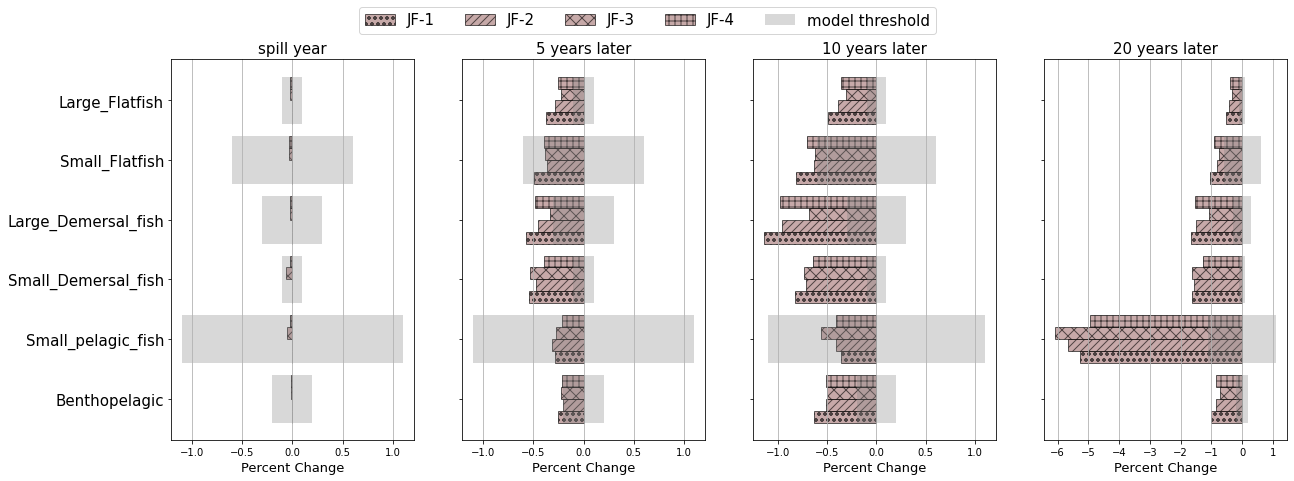

In [20]:
progressive_boxplot_vertebrates(groups.other_fish)

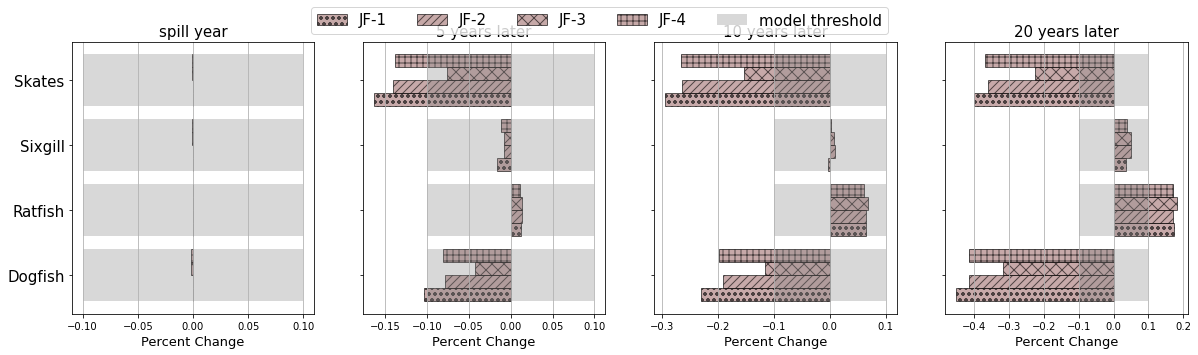

In [21]:
progressive_boxplot_vertebrates(groups.sharks)

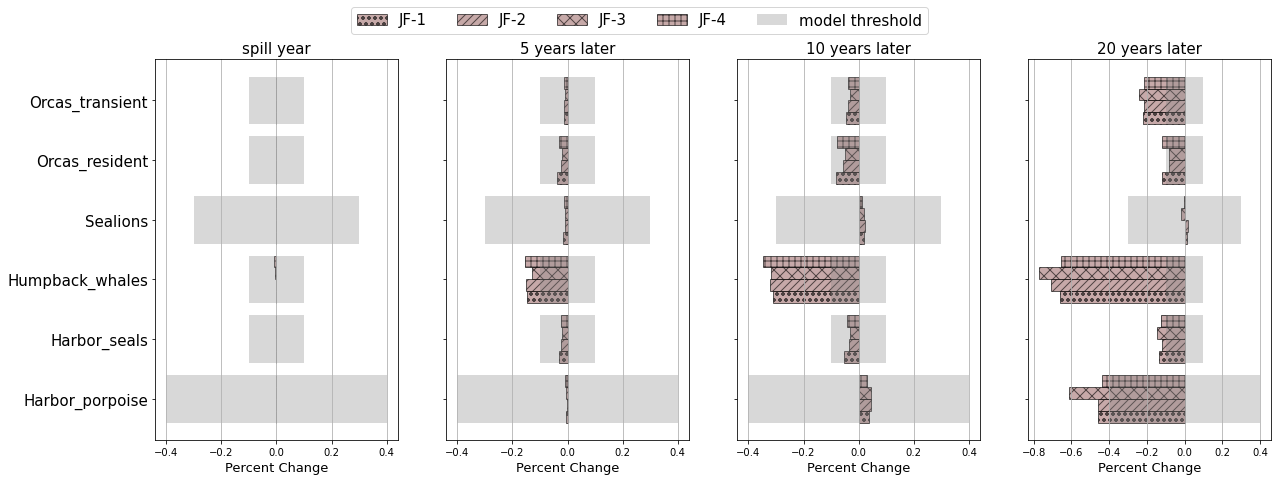

In [22]:
progressive_boxplot_vertebrates(groups.mammals)

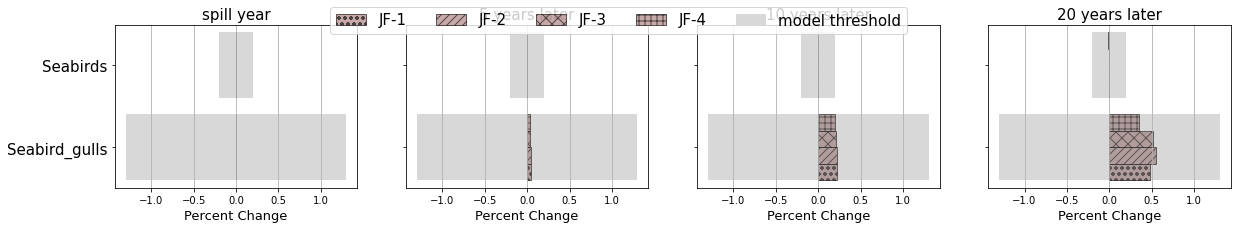

In [23]:
progressive_boxplot_vertebrates(groups.birds)

## Regional changes

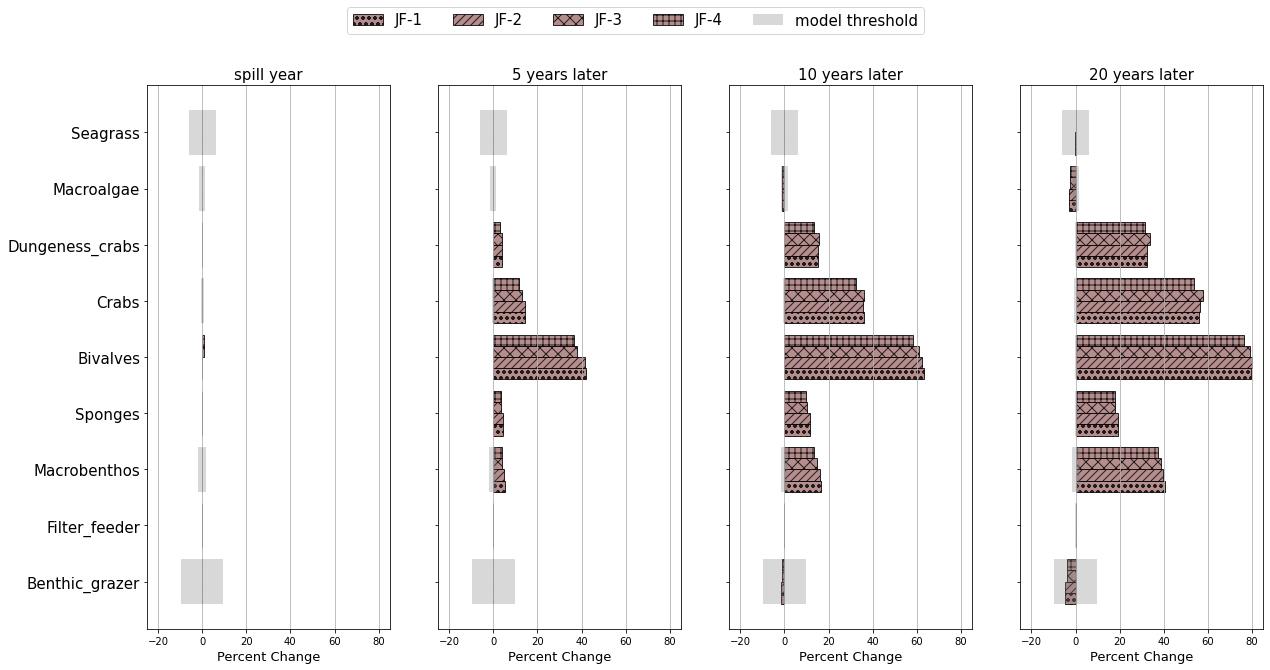

In [30]:
progressive_boxplot_benthic(groups.benthos, location=affected_boxes,x_lim=[-25, 85])

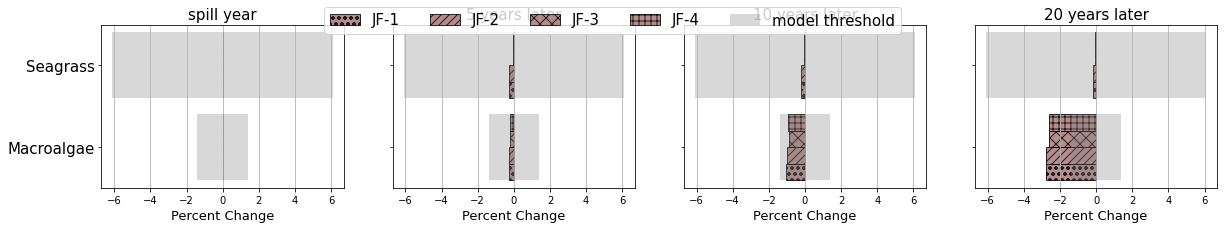

In [25]:
progressive_boxplot_benthic(groups.macroalgae, location=affected_boxes)

## Affected groups
Relative change >1%

In [26]:
affected_benthic = {
    'macrobenthos':'Macrobenthos',  
    'sponges':'Sponges', 'bivalves':'Bivalves', 'crabs':'Crabs', 'dungeness crabs':'Dungeness_crabs',
    'macroalgae':'Macroalgae',
}

affected_pelagic = {
    'porpoises':'Harbor_porpoise',
    'Hatchery Coho':'Hatchery_Coho_salmon','Hatchery Sockeye':'Hatchery_Sockeye_salmon',
    'Other salmonids':'Other_salmonids','small demersal':'Small_Demersal_fish', 
    'large demersal':'Large_Demersal_fish', 'small flatfish':'Small_Flatfish', 
    'small pelagic':'Small_pelagic_fish',
}

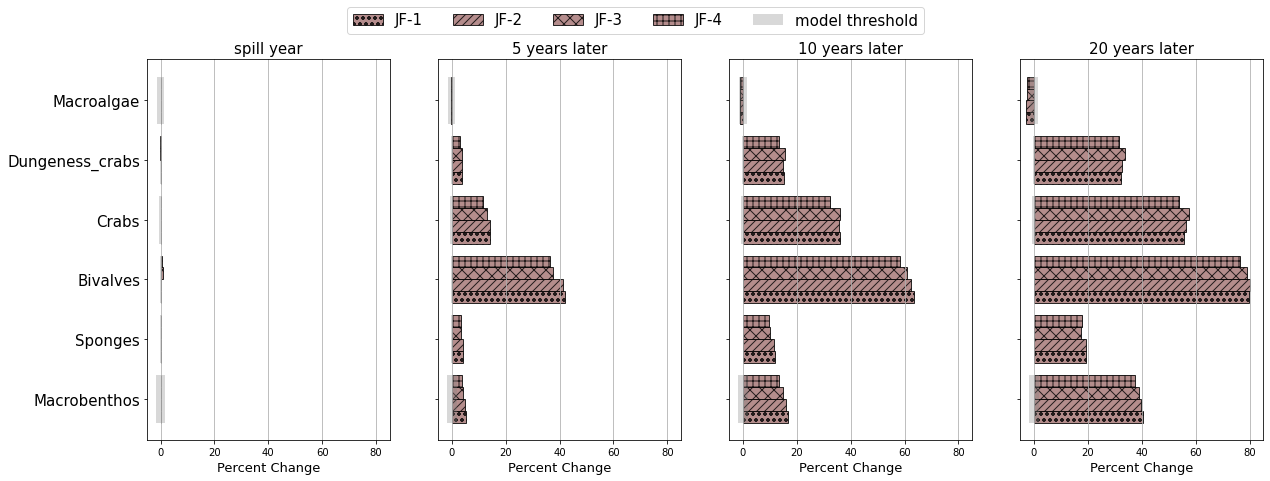

In [27]:
progressive_boxplot_benthic(affected_benthic, location=affected_boxes, x_lim=[-5, 85])

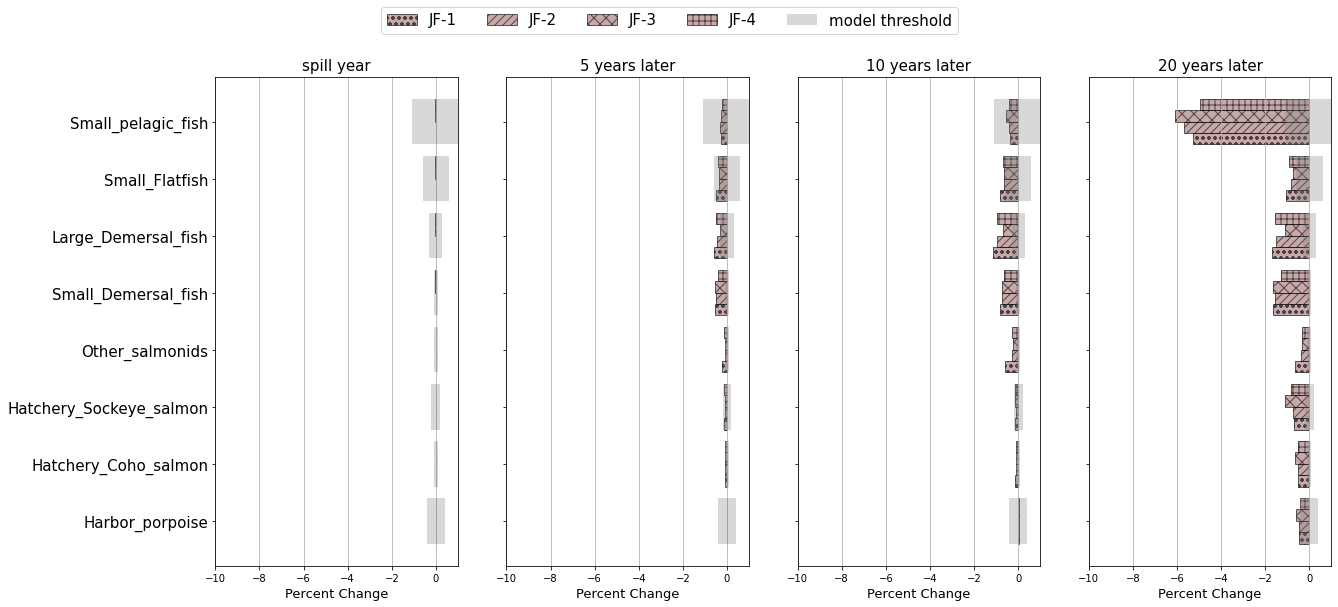

In [28]:
progressive_boxplot_vertebrates(affected_pelagic, x_lim=[-10, 1])